In [8]:
import random

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gurobipy as gp

In [9]:
def randomized_greedy_qap(distance_matrix, flow_matrix, alpha=0.1):
    num_facilities = distance_matrix.shape[0]
    
    unassigned = set(range(num_facilities))
    assignment = [-1] * num_facilities

    while unassigned:
        min_cost = float('inf')
        selected_pair = (None, None)

        # Consider all pairs (i, j) where i is an unassigned facility and j is a location
        candidates = []
        for i in unassigned:
            for j in range(num_facilities):
                if assignment[j] == -1:  # check if location j is unassigned
                    cost = sum(flow_matrix[i][k] * distance_matrix[j][assignment[k]] for k in range(num_facilities) if assignment[k] != -1)
                    if cost < min_cost:
                        min_cost = cost
                        selected_pair = (i, j)
                        candidates = [(i, j)]
                    elif cost == min_cost:
                        candidates.append((i, j))
        
        # Select a random pair from the top alpha fraction of candidates
        num_candidates_to_consider = int(alpha * len(candidates))
        if num_candidates_to_consider < 1:
            num_candidates_to_consider = 1
        i, j = candidates[np.random.choice(num_candidates_to_consider)]

        # Assign facility i to location j
        assignment[j] = i
        unassigned.remove(i)

    return assignment

In [10]:
import os
print(os.getcwd())

c:\Users\User\Desktop


In [13]:

def visualize_qap_solution(distance_matrix, flow_matrix, solution):
    num_facilities = distance_matrix.shape[0]
    cost_matrix = np.zeros((num_facilities, num_facilities))

    for i in range(num_facilities):
        for j in range(num_facilities):
            cost_matrix[i][j] = distance_matrix[i][j] * flow_matrix[solution[i]][solution[j]]

    plt.matshow(cost_matrix, cmap='viridis')
    plt.colorbar(label='Cost')
    plt.title('Cost for each Facility-Location Mapping')
    plt.xlabel('Facilities')
    plt.ylabel('Locations')
    plt.show()

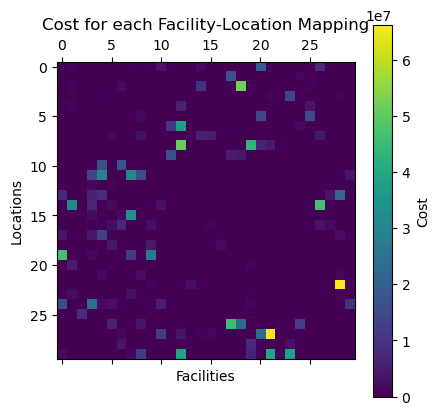

[4, 22, 17, 5, 7, 24, 8, 6, 20, 1, 11, 14, 2, 28, 27, 0, 12, 10, 23, 18, 25, 9, 13, 21, 3, 19, 26, 16, 29, 15]


In [14]:
# for managing file opening and closing
def read_integers(filename):
    with open(filename) as f:
        return [int(elem) for elem in f.read().split()]

# Using raw string for the path
file_path = r'C:\Users\User\Desktop\AAH\QAP-main\QAP-main\QAPInstances\tai30b.dat'  # Change 'tai30b.dat' to your actual file name
file_it = iter(read_integers(file_path))

# Number of points
n = next(file_it)

# Distance between locations
w = np.array([[next(file_it) for j in range(n)] for i in range(n)])
d = np.array([[next(file_it) for j in range(n)] for i in range(n)])

solution = randomized_greedy_qap(w, d)
visualize_qap_solution(w, d, solution)
print(randomized_greedy_qap(w, d))